#Q1)

##1)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold   
from sklearn.metrics import accuracy_score


In [73]:
df= pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 2/ENB2012_data.xlsx - Φύλλο1.csv')
df = shuffle(df)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
111,0.82,612.5,318.5,147.00,7.0,5,0.1,2,22.79
114,0.79,637.0,343.0,147.00,7.0,4,0.1,2,36.97
33,0.69,735.0,294.0,220.50,3.5,3,0.0,0,6.79
587,0.86,588.0,294.0,147.00,7.0,5,0.4,2,31.64
190,0.62,808.5,367.5,220.50,3.5,4,0.1,3,12.71
...,...,...,...,...,...,...,...,...,...
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
625,0.98,514.5,294.0,110.25,7.0,3,0.4,3,32.69
744,0.74,686.0,245.0,220.50,3.5,2,0.4,5,14.41
94,0.62,808.5,367.5,220.50,3.5,4,0.1,1,12.93


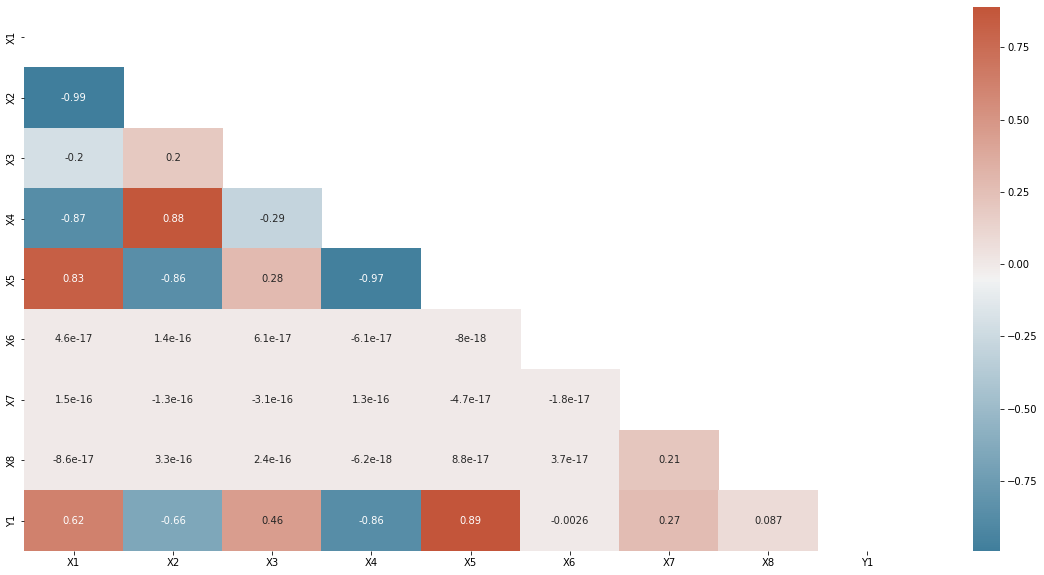

In [74]:
plt.figure(figsize=(20,10))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [75]:
l1=int(len(df)*0.7)
trainData=df[:l1]

In [76]:
l2=int(len(df)*0.10)
ValidationData=df[l1:l1+l2]

In [77]:
testData=df[l1+l2:]

In [78]:
A = trainData['Y1']


In [79]:
B = trainData.drop(columns=['Y1'])

## 2)

In [80]:
from sklearn.tree import DecisionTreeRegressor 
list1=[]
list2=[]
for i in range(1,20):
  list2.append(i)
  Regression = DecisionTreeRegressor(random_state = 0,max_depth=i) 
  
  Regression.fit(B, A)
  VData= ValidationData.drop(columns=['Y1'])
  Pred1 = Regression.predict(VData)
  C = ValidationData['Y1']
  list1.append(mse(C,Pred1))

print("Minimum mean squared error is: ")
print(min(list1))


Minimum mean squared error is: 
0.18619688348291608


Text(0, 0.5, 'Mean Square error')

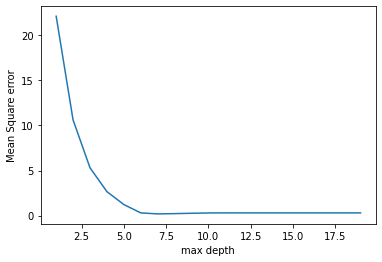

In [81]:
plt.plot(list2,list1)
plt.xlabel('max depth')
plt.ylabel('Mean Square error')

## 3)

### Hold out cross validation

In [82]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

l=int(len(df)*0.8)

X_train=X[:l]
X_test=X[l:]

y_train=y[:l]
y_test=y[l:]

Regression2 = DecisionTreeRegressor(random_state = 0,max_depth=6)
Regression2.fit(X_train,y_train)
pred_values = Regression2.predict(X_test) 
mse1 = mse(y_test,pred_values)
print(mse1)

0.3643703703319222


### 5 Fold Cross Validation

In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# print(X)
# print(y) 
 
k = 5
kf = KFold(n_splits=k, random_state=None)

 
mean_s_e = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    Regression1 = DecisionTreeRegressor(random_state = 0,max_depth=6)  # from graaph we get at max depth = 6 we have min mse
    Regression1.fit(X_train,y_train)
    pred_values = Regression1.predict(X_test) 
    mse1 = mse(y_test,pred_values)
    mean_s_e.append(mse1)
     
avg_mse = sum(mean_s_e)/k
 
print('Mse of each fold - {}'.format(mean_s_e))
print('Avg Mean Square Error : {}'.format(avg_mse))

Mse of each fold - [0.38177677161613255, 0.24190127725979266, 0.316054401841227, 0.30517730891652145, 0.36674599366742405]
Avg Mean Square Error : 0.32233115066021956


### Repeated 5 fold cross validation

In [84]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# print(X)
# print(y) 
k = 5

avg_mse_overall=[]
min_mse_overall=[]
for i in range(5):
  kf = KFold(n_splits=k,shuffle = True) 
  mean_s_e = []
  
  for train_index , test_index in kf.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
      Regression1 = DecisionTreeRegressor(random_state = 0,max_depth=6)  # from graaph we get at max depth = 6 we have min mse
      Regression1.fit(X_train,y_train)
      pred_values = Regression1.predict(X_test) 
      mse1 = mse(y_test,pred_values)
      mean_s_e.append(mse1)
      
  avg_mse = sum(mean_s_e)/k
  
  print('Mse of '+str(i+1)+' fold - {}'.format(mean_s_e))
  avg_mse_overall.append(avg_mse)
  min_mse_overall.append(min(mean_s_e))

avg_mse_overall_out = sum(avg_mse_overall)/k
min_mse_overall_out = min(min_mse_overall)

print('Average MSE overall :')
print(avg_mse_overall_out)
print('Minimun MSE overall :')
print(min_mse_overall_out)



Mse of 1 fold - [0.2903277157215488, 0.2685498134218703, 0.30705298066292863, 0.39760717614431845, 0.35873538555459467]
Mse of 2 fold - [0.3610894865086233, 0.2616442368566398, 0.21975535340584298, 0.3487632873363695, 0.3341599796351828]
Mse of 3 fold - [0.31019019325590425, 0.2895079305155634, 0.35538535869942167, 0.2587559856732294, 0.32388379325382444]
Mse of 4 fold - [0.3237285438364839, 0.3090391178036133, 0.3002762884127186, 0.31978872237217776, 0.3358744733703934]
Mse of 5 fold - [0.3021818924955887, 0.3223165521779412, 0.34605923733698674, 0.25420215027594006, 0.3083570142146961]
Average MSE overall :
0.3122893067576961
Minimun MSE overall :
0.21975535340584298


# Q2)

## Classifier

## 1)

In [85]:
df1= pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 2/iris1.csv')
df1 = shuffle(df1)
df1.rename(columns={"X3":"Petal Length","X4":"Petal Width"},inplace= True)
df1

,X1,X2,Petal Length,Petal Width,Y1
81,5.5,2.4,3.7,1.0,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica
...,...,...,...,...,...
7,5.0,3.4,1.5,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor


In [86]:
df1 = df1.drop(columns=["X1","X2"],axis=1)


In [87]:
l1=int(len(df1)*0.8)
trainData=df1[:l1]
A= trainData['Y1']
trainData = trainData.drop(columns=['Y1'])

In [88]:
testData=df1[l1:]
B=testData['Y1']
testData = testData.drop(columns=['Y1'])

In [89]:
from sklearn.tree import DecisionTreeClassifier

Classifier = DecisionTreeClassifier(max_depth=2)

Classifier.fit(trainData,A)

DecisionTreeClassifier(max_depth=2)

In [90]:
Pred2 = Classifier.predict(testData)

Pred2

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [91]:
print(acc(B,Pred2)*100)

93.33333333333333


[Text(0.4, 0.8333333333333334, 'Petal Width <= 0.8\ngini = 0.664\nsamples = 120\nvalue = [36, 39, 45]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'Petal Length <= 4.75\ngini = 0.497\nsamples = 84\nvalue = [0, 39, 45]\nclass = Iris-virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 48\nvalue = [0, 4, 44]\nclass = Iris-virginica')]

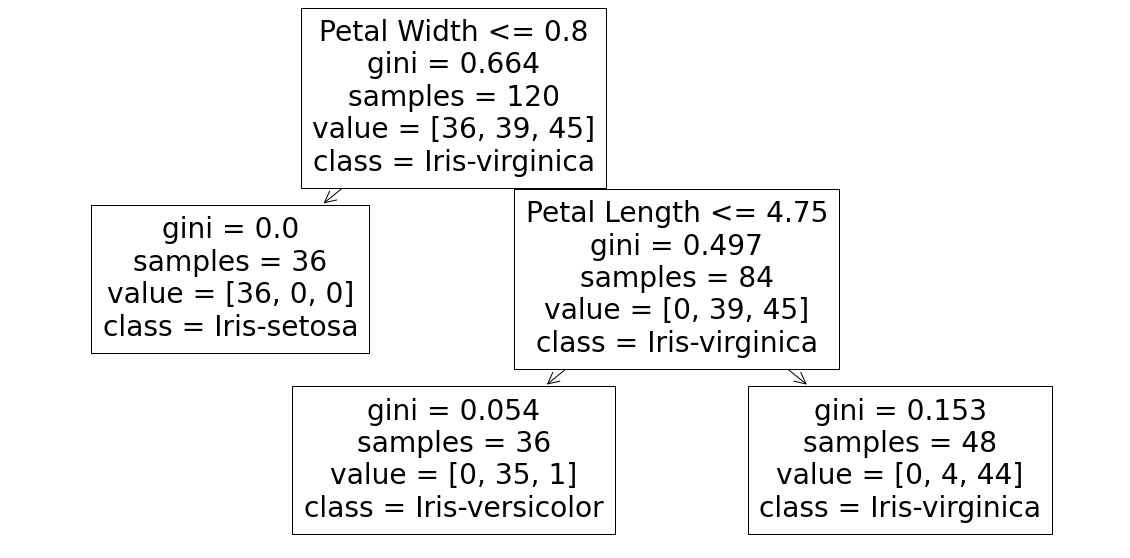

In [92]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))

tree.plot_tree(Classifier,feature_names=df1.columns,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
   

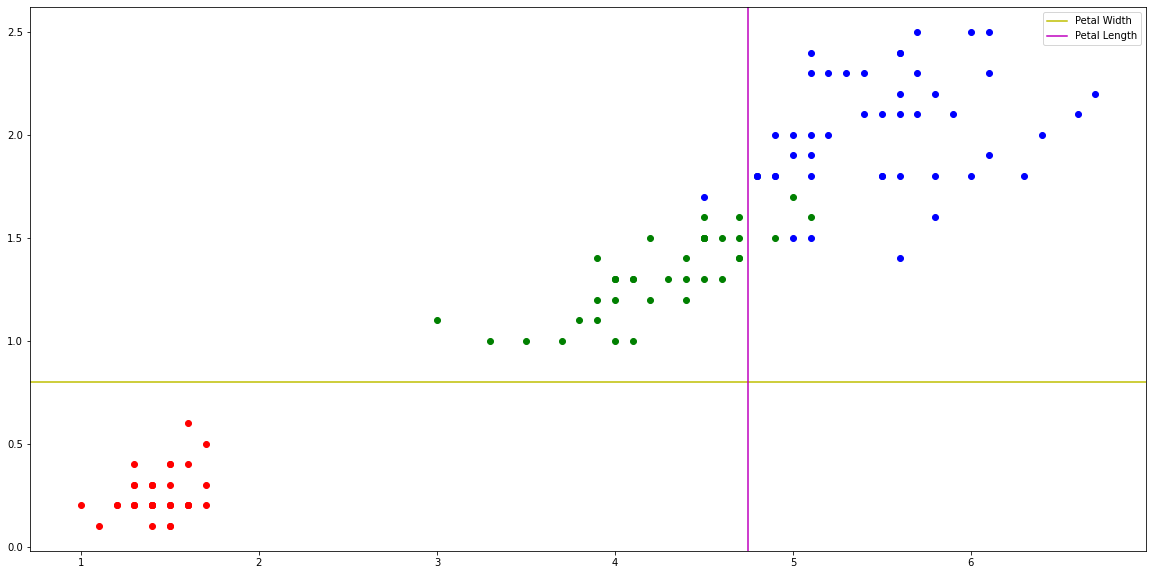

In [93]:
df1_train = df1[:l1]
plt.figure(figsize=(20,10))

for i,row in df1_train.iterrows():
  if(row["Y1"] == 'Iris-setosa'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'r')
  if(row["Y1"] == 'Iris-versicolor'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'g')
  if(row["Y1"] == 'Iris-virginica'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'b')

feature = Classifier.tree_.feature
threshold = Classifier.tree_.threshold
children_left = Classifier.tree_.children_left
children_right = Classifier.tree_.children_right
value = Classifier.tree_.value


for i in range(len(feature)):
  if(feature[i]==1):
    plt.axhline(y=threshold[i],c = 'y',label = "Petal Width")
  elif feature[i]==0:
    plt.axvline(x=threshold[i],c = 'm',label = "Petal Length") 
     
plt.legend()

##2)


In [94]:
df2_train=df1[:l1]
for i,row in df2_train.iterrows():
  if(row['Y1']=='Iris-versicolor' and row['Petal Length']==4.8 and row['Petal Width']==1.8):
    df2_train=df2_train.drop(i)

print(len(df2_train))

df2_train

119


,Petal Length,Petal Width,Y1
81,3.7,1.0,Iris-versicolor
80,3.8,1.1,Iris-versicolor
51,4.5,1.5,Iris-versicolor
128,5.6,2.1,Iris-virginica
66,4.5,1.5,Iris-versicolor
...,...,...,...
68,4.5,1.5,Iris-versicolor
72,4.9,1.5,Iris-versicolor
92,4.0,1.2,Iris-versicolor
19,1.5,0.3,Iris-setosa


In [95]:
A2 = df2_train['Y1']
df2_train=df2_train.drop(columns=['Y1'])
Classifier_1 = DecisionTreeClassifier(max_depth = 2)

Classifier_1.fit(df2_train,A2)

DecisionTreeClassifier(max_depth=2)

In [96]:
Pred3 = Classifier_1.predict(testData)

Pred3

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

[Text(0.4, 0.8333333333333334, 'Petal Length <= 2.35\ngini = 0.664\nsamples = 119\nvalue = [36, 38, 45]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'Petal Length <= 4.75\ngini = 0.496\nsamples = 83\nvalue = [0, 38, 45]\nclass = Iris-virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.12\nsamples = 47\nvalue = [0, 3, 44]\nclass = Iris-virginica')]

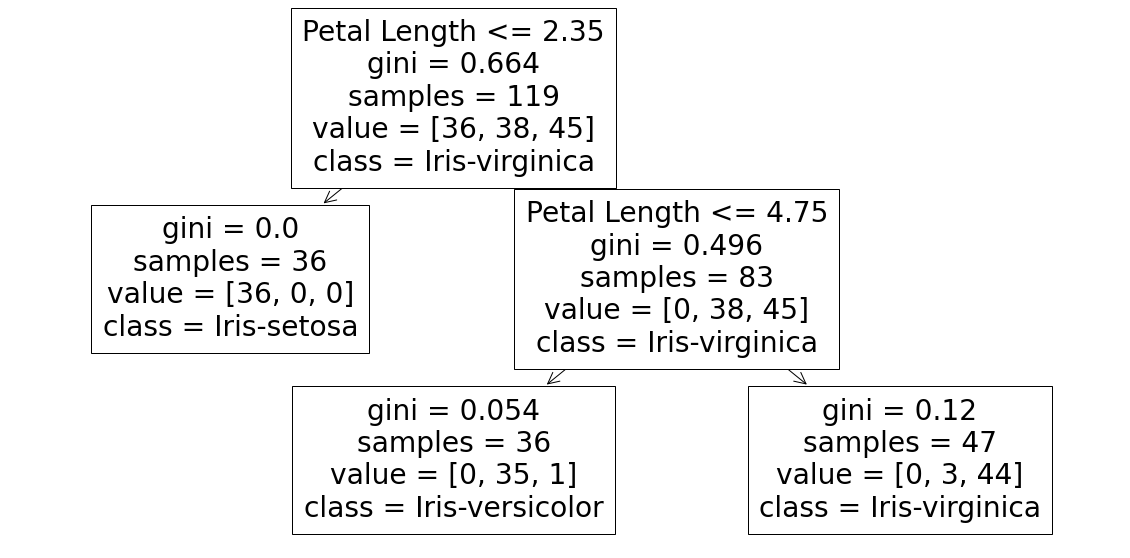

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
tree.plot_tree(Classifier_1,feature_names=df1.columns,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
   

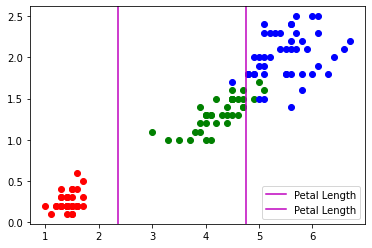

In [98]:
df3_train=df1[:l1]
# plt.figure(figsize=(20,10))

for i,row in df3_train.iterrows():
  if(row["Y1"] == 'Iris-setosa'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'r')
  if(row["Y1"] == 'Iris-versicolor'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'g')
  if(row["Y1"] == 'Iris-virginica'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'b')

feature = Classifier_1.tree_.feature
threshold = Classifier_1.tree_.threshold
children_left = Classifier_1.tree_.children_left
children_right = Classifier_1.tree_.children_right
value = Classifier_1.tree_.value


for i in range(len(feature)):
  if(feature[i]==1):
    plt.axhline(y=threshold[i],c = 'y',label = "Petal Width")
  elif feature[i]==0:
    plt.axvline(x=threshold[i],c = 'm',label = "Petal Length") 


plt.legend()

## 3)

In [99]:
df4_train=df1[:l1]
A4 = df4_train['Y1']
df4_train=df4_train.drop(columns=['Y1'])
Classifier_2 = DecisionTreeClassifier(max_depth=None)

Classifier_2.fit(df4_train,A4)

DecisionTreeClassifier()

In [100]:
Pred4 = Classifier_2.predict(testData)

Pred4

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

[Text(0.3181818181818182, 0.9285714285714286, 'Petal Width <= 0.8\ngini = 0.664\nsamples = 120\nvalue = [36, 39, 45]\nclass = Iris-virginica'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.4090909090909091, 0.7857142857142857, 'Petal Length <= 4.75\ngini = 0.497\nsamples = 84\nvalue = [0, 39, 45]\nclass = Iris-virginica'),
 Text(0.18181818181818182, 0.6428571428571429, 'Petal Width <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.6363636363636364, 0.6428571428571429, 'Petal Width <= 1.75\ngini = 0.153\nsamples = 48\nvalue = [0, 4, 44]\nclass = Iris-virginica'),
 Text(0.45454545454545453, 0.5, 'Petal Length <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nc

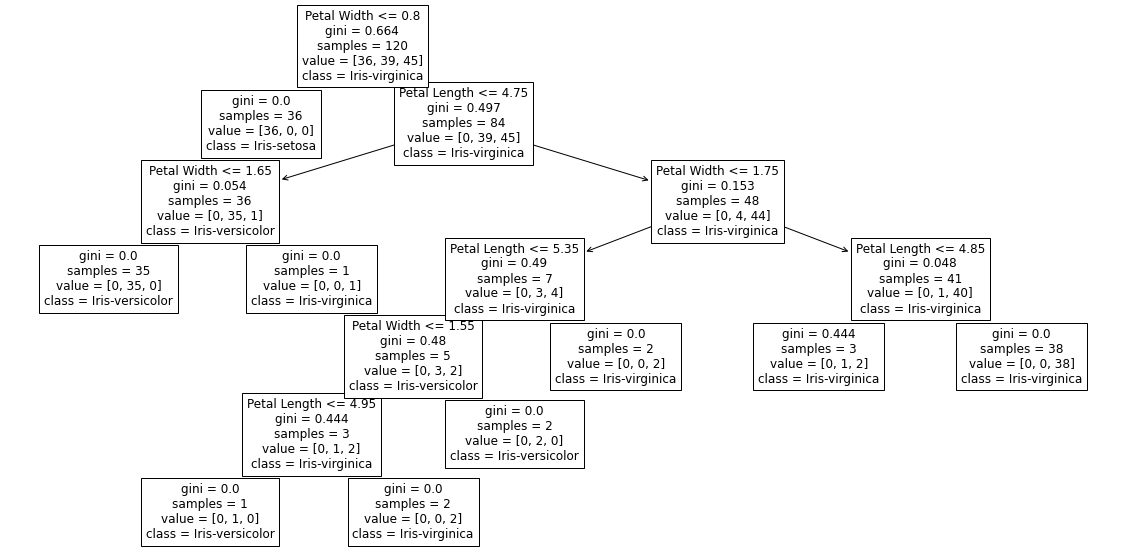

In [101]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
tree.plot_tree(Classifier_2,feature_names=df1.columns,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
   

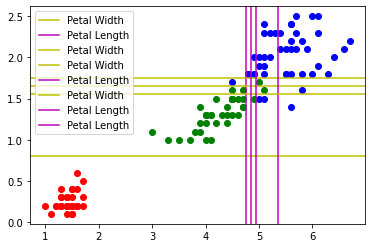

In [102]:
df4_train=df1[:l1]
# plt.figure(figsize=(20,10))

for i,row in df4_train.iterrows():
  if(row["Y1"] == 'Iris-setosa'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'r')
  if(row["Y1"] == 'Iris-versicolor'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'g')
  if(row["Y1"] == 'Iris-virginica'):
    plt.scatter(row["Petal Length"],row["Petal Width"],c = 'b')

feature = Classifier_2.tree_.feature
threshold = Classifier_2.tree_.threshold
children_left = Classifier_2.tree_.children_left
children_right = Classifier_2.tree_.children_right
value = Classifier_2.tree_.value


for i in range(len(feature)):
  if(feature[i]==1):
    plt.axhline(y=threshold[i],c = 'y',label = "Petal Width")
  elif feature[i]==0:
    plt.axvline(x=threshold[i],c = 'm',label = "Petal Length")
   

plt.legend()

##4)

In [103]:
D={"X1": np.random.uniform(0,5,100) , "X2": np.random.uniform(0,5,100)}
data_0 = pd.DataFrame(D)
data_0=shuffle(data_0)
data_0.head()

Y=[]
for i in data_0['X1']:
  if i>2.5:
    Y.append(1)
  else :
    Y.append(0)

data_0['Y1']=Y

data_0.head()

,X1,X2,Y1
45,2.824750,0.441774,1
60,1.062691,1.641916,0
11,0.542706,1.438636,0
64,1.134399,4.459831,0
66,0.610689,3.959067,0


In [104]:
l=int(len(data_0)*0.8)
data_0_tr=data_0[:l]
data_0_te=data_0[l:]

In [105]:
data_0_trB=data_0.drop(columns=['Y1'])

In [106]:
data_0_trA=data_0['Y1']

In [107]:
Classifier_data_0= DecisionTreeClassifier(max_depth=2)
Classifier_data_0.fit(data_0_trB,data_0_trA)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.75, 'X1 <= 2.484\ngini = 0.495\nsamples = 100\nvalue = [55, 45]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]\nclass = 1'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]\nclass = 0')]

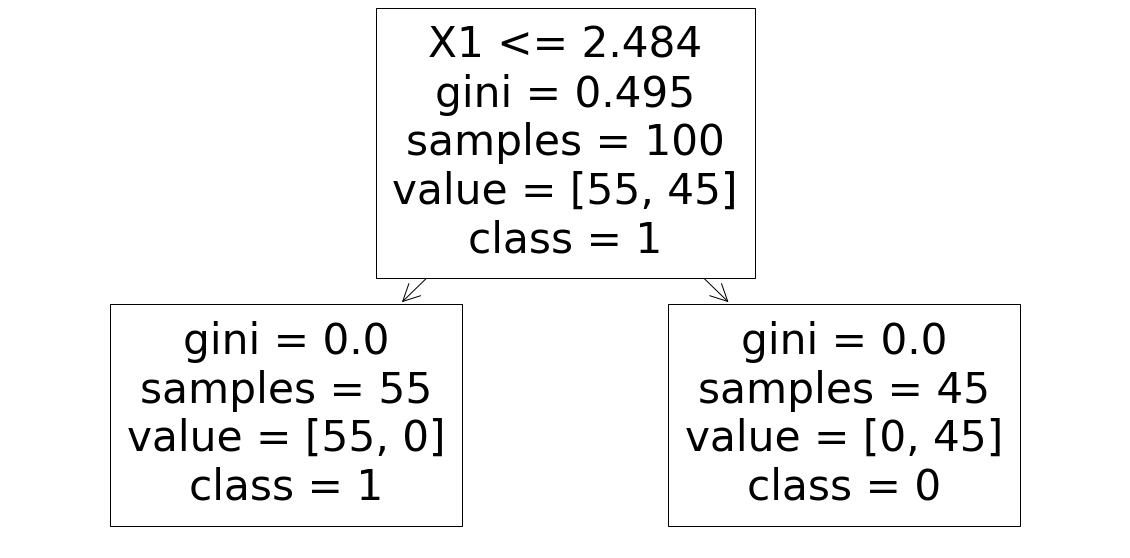

In [108]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
tree.plot_tree(Classifier_data_0,feature_names=data_0.columns,class_names=['1','0'])

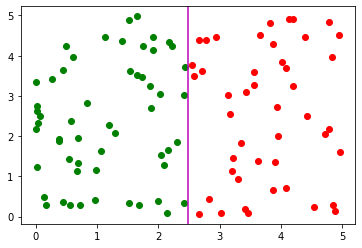

In [109]:

feature = Classifier_data_0.tree_.feature
threshold = Classifier_data_0.tree_.threshold
children_left = Classifier_data_0.tree_.children_left
children_right = Classifier_data_0.tree_.children_right
value = Classifier_data_0.tree_.value
for i,row in data_0.iterrows():
  if(row["Y1"] == 1):
    plt.scatter(row["X1"],row["X2"],c = 'r')
  if(row["Y1"] == 0):
    plt.scatter(row["X1"],row["X2"],c = 'g')


for i in range(len(feature)):
  if(feature[i]==1):
    plt.axhline(y=threshold[i],c = 'y',label = "X2")
  elif feature[i]==0:
    plt.axvline(x=threshold[i],c = 'm',label = "X1")
   

In [110]:
theta = np.radians(45) 
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, s), (-s, c)))
# print(R)
for i,row in data_0.iterrows():
 Result=np.matmul(np.array([data_0['X1'][i],data_0['X2'][i]]),R)
 data_0['X1'][i]=Result[0]
 data_0['X2'][i]=Result[1]
data_0.head() 

<ipython-input-110-5daf27041e48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['X1'][i]=Result[0]
<ipython-input-110-5daf27041e48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['X2'][i]=Result[1]


,X1,X2,Y1
45,1.685019,2.309781,1
60,-0.409574,1.912446,0
11,-0.633518,1.401020,0
64,-2.351435,3.955718,0
66,-2.367661,3.231306,0


In [111]:
l1=int(len(data_0)*0.8)
data_0_tr1=data_0[:l]
data_0_te1=data_0[l:]

In [112]:
data_0_tr1B=data_0.drop(columns=['Y1'])

In [113]:
data_0_tr1A=data_0['Y1']

In [114]:
Classifier_data_01= DecisionTreeClassifier(max_depth=2)
Classifier_data_01.fit(data_0_tr1B,data_0_tr1A)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X2 <= 4.613\ngini = 0.495\nsamples = 100\nvalue = [55, 45]\nclass = 1'),
 Text(0.25, 0.5, 'X1 <= 1.034\ngini = 0.411\nsamples = 76\nvalue = [54, 22]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.163\nsamples = 56\nvalue = [51, 5]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.255\nsamples = 20\nvalue = [3, 17]\nclass = 0'),
 Text(0.75, 0.5, 'X1 <= -1.784\ngini = 0.08\nsamples = 24\nvalue = [1, 23]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]\nclass = 0')]

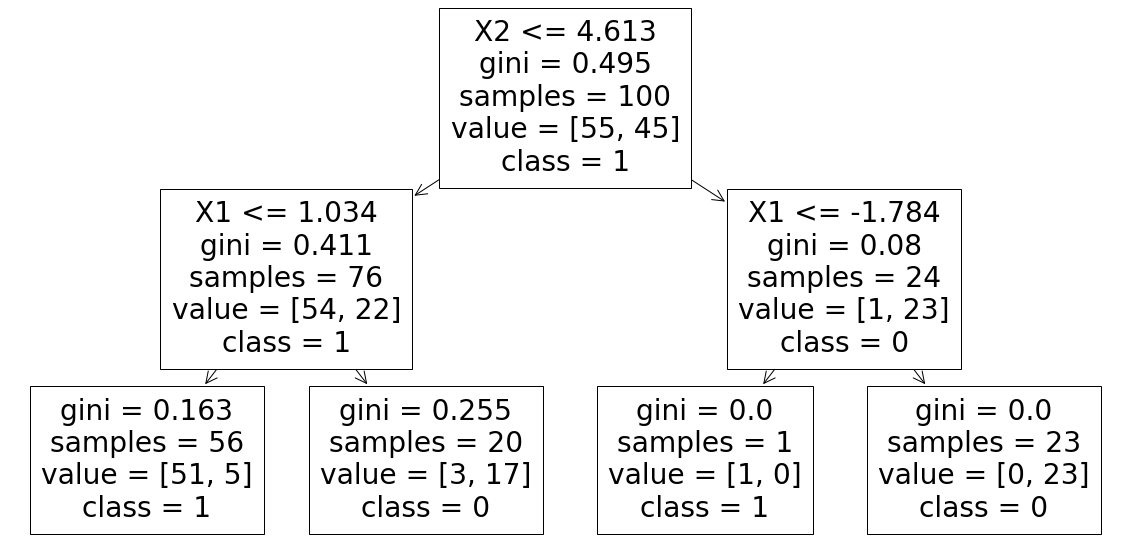

In [115]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
tree.plot_tree(Classifier_data_01,feature_names=data_0.columns,class_names=['1','0'])

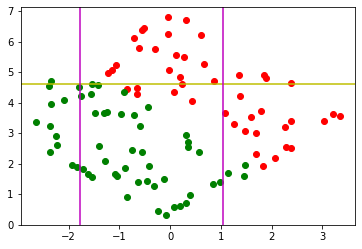

In [116]:
feature = Classifier_data_01.tree_.feature
threshold = Classifier_data_01.tree_.threshold
children_left = Classifier_data_01.tree_.children_left
children_right = Classifier_data_01.tree_.children_right
value = Classifier_data_01.tree_.value
# print(feature)
# print(threshold)

for i,row in data_0.iterrows():
  if(row["Y1"] == 1):
    plt.scatter(row["X1"],row["X2"],c = 'r')
  if(row["Y1"] == 0):
    plt.scatter(row["X1"],row["X2"],c = 'g')
    
for i in range(len(feature)):
  if(feature[i]==1):
    plt.axhline(y=threshold[i],c = 'y',label = "X2")
  elif feature[i]==0:
    plt.axvline(x=threshold[i],c = 'm',label = "X1")




## Regressor

##1)

In [117]:
import pandas as pd

DataFrame_task=pd.read_csv("/content/drive/MyDrive/PRML lab data /Lab 2/task.csv")
DataFrame_task = shuffle(DataFrame_task)
DataFrame_task


,X,Y
58,0.045227,0.884362
27,0.514234,0.272827
194,0.339030,-0.041163
152,0.144895,0.502308
150,0.908266,0.741453
...,...,...
158,0.237638,0.253568
23,0.366362,0.154155
128,0.006952,0.983737
145,0.036887,0.888625


In [118]:
p1=int(len(DataFrame_task)*0.8)
DataFrame_task_train = DataFrame_task[:p1]


In [119]:
DataFrame_task_train_B=DataFrame_task_train[['X']]
DataFrame_task_train_A=DataFrame_task_train['Y']



In [120]:
from sklearn.tree import DecisionTreeRegressor 

Regressor_1 = DecisionTreeRegressor(max_depth=2) 
Regressor_1.fit(DataFrame_task_train_B, DataFrame_task_train_A)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X <= 0.863\nsquared_error = 0.095\nsamples = 160\nvalue = 0.343'),
 Text(0.25, 0.5, 'X <= 0.186\nsquared_error = 0.076\nsamples = 134\nvalue = 0.27'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.031\nsamples = 31\nvalue = 0.681'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.024\nsamples = 103\nvalue = 0.147'),
 Text(0.75, 0.5, 'X <= 0.904\nsquared_error = 0.02\nsamples = 26\nvalue = 0.721'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.007\nsamples = 10\nvalue = 0.589'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.011\nsamples = 16\nvalue = 0.804')]

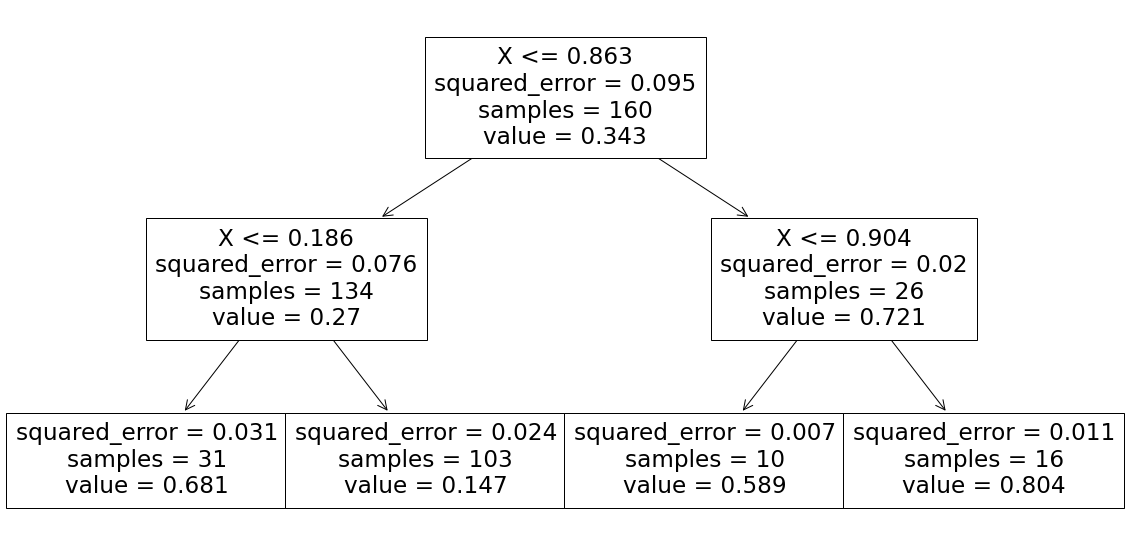

In [121]:
plt.figure(figsize=(20,10))
tree.plot_tree(Regressor_1,feature_names=DataFrame_task.columns)

In [122]:
Regressor_2 = DecisionTreeRegressor(max_depth=3)
Regressor_2.fit(DataFrame_task_train_B, DataFrame_task_train_A) 

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'X <= 0.863\nsquared_error = 0.095\nsamples = 160\nvalue = 0.343'),
 Text(0.25, 0.625, 'X <= 0.186\nsquared_error = 0.076\nsamples = 134\nvalue = 0.27'),
 Text(0.125, 0.375, 'X <= 0.092\nsquared_error = 0.031\nsamples = 31\nvalue = 0.681'),
 Text(0.0625, 0.125, 'squared_error = 0.017\nsamples = 14\nvalue = 0.833'),
 Text(0.1875, 0.125, 'squared_error = 0.007\nsamples = 17\nvalue = 0.555'),
 Text(0.375, 0.375, 'X <= 0.772\nsquared_error = 0.024\nsamples = 103\nvalue = 0.147'),
 Text(0.3125, 0.125, 'squared_error = 0.016\nsamples = 91\nvalue = 0.112'),
 Text(0.4375, 0.125, 'squared_error = 0.005\nsamples = 12\nvalue = 0.405'),
 Text(0.75, 0.625, 'X <= 0.904\nsquared_error = 0.02\nsamples = 26\nvalue = 0.721'),
 Text(0.625, 0.375, 'X <= 0.89\nsquared_error = 0.007\nsamples = 10\nvalue = 0.589'),
 Text(0.5625, 0.125, 'squared_error = 0.006\nsamples = 5\nvalue = 0.543'),
 Text(0.6875, 0.125, 'squared_error = 0.004\nsamples = 5\nvalue = 0.635'),
 Text(0.875, 0.375, 'X <= 0.

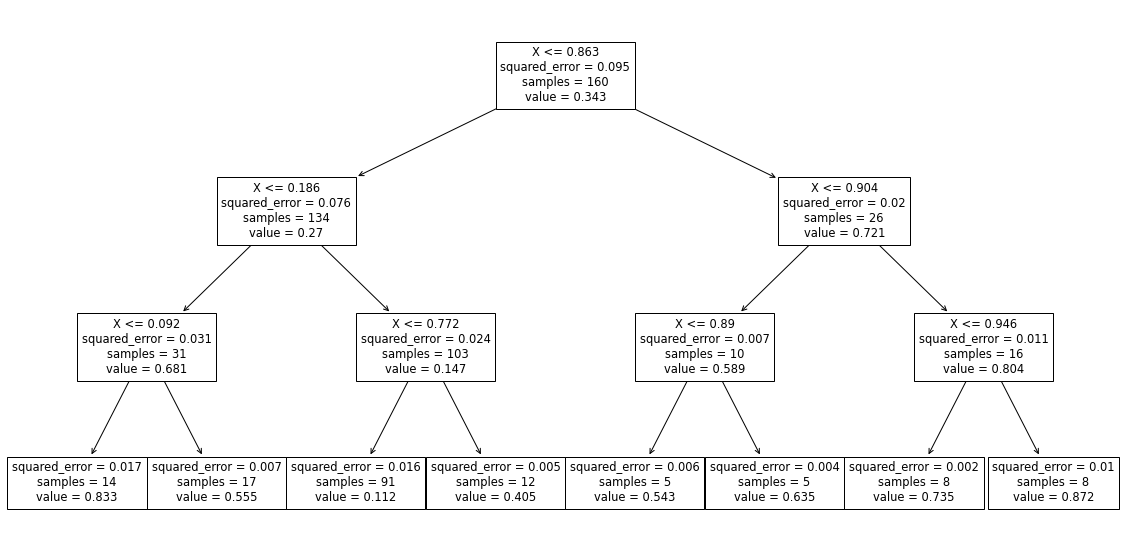

In [123]:
plt.figure(figsize=(20,10))
tree.plot_tree(Regressor_2,feature_names=DataFrame_task.columns)

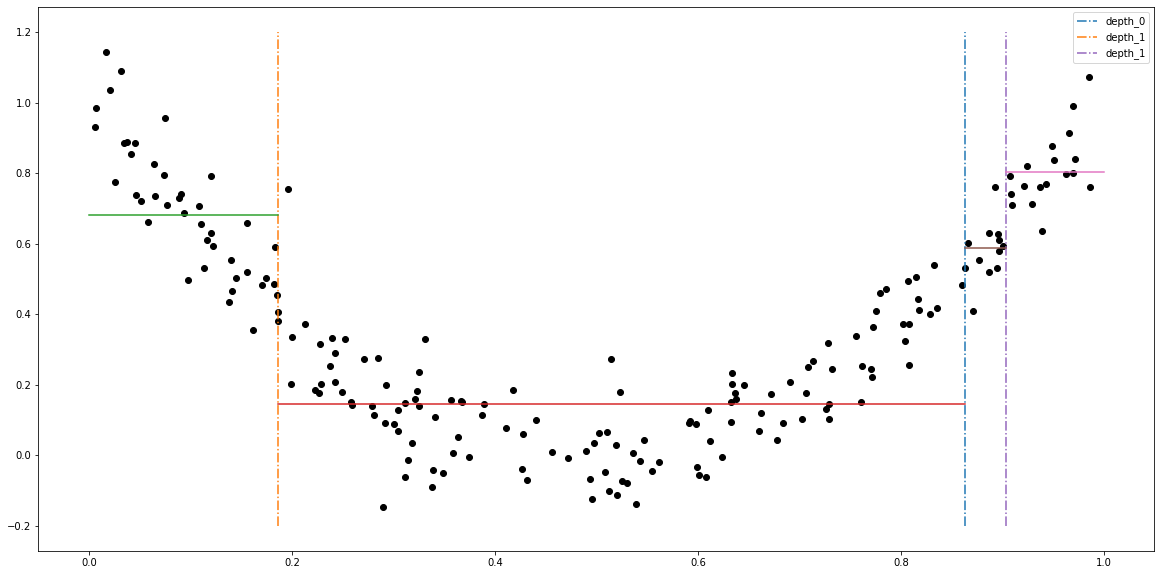

In [124]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.scatter(DataFrame_task['X'],DataFrame_task['Y'],c = 'black')

def Regression_pred_plot(Regressor,i,x,y,level):
  
  feature = Regressor.tree_.feature
  threshold = Regressor.tree_.threshold
  children_left = Regressor.tree_.children_left
  children_right = Regressor.tree_.children_right
  value = Regressor.tree_.value

  t=threshold[i]
  if(children_left[i] == -1 and children_right[i] == -1):
    plt.plot([x,y],[value[i][0],value[i][0]])
  if (t != -2):
    plt.plot([t,t],[-0.2,1.2],linestyle = 'dashdot',label = "depth_" + str(level))
 
  if(children_left[i] != -1):
    Regression_pred_plot(Regressor,children_left[i],x,t,level+1)
  if(children_right[i] != -1):
    Regression_pred_plot(Regressor,children_right[i],t,y,level+1) 
  return(  )

Regression_pred_plot(Regressor_1,0,0,1,0)
plt.legend()


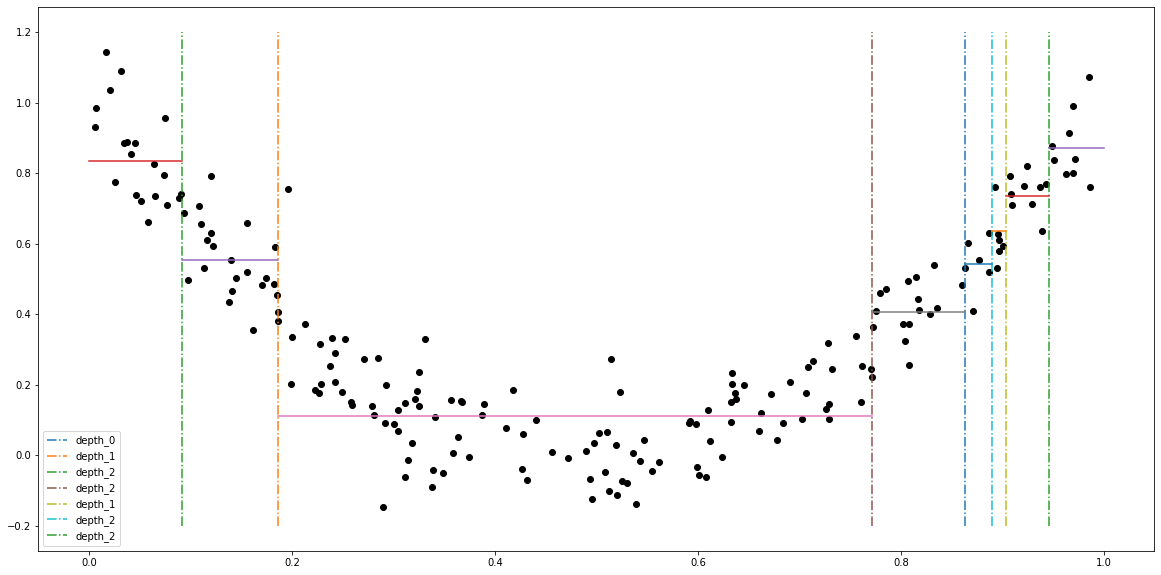

In [125]:
plt.figure(figsize=(20,10))

plt.scatter(DataFrame_task['X'],DataFrame_task['Y'],c ='black')
Regression_pred_plot(Regressor_2,0,0,1,0)
plt.legend()

##2)

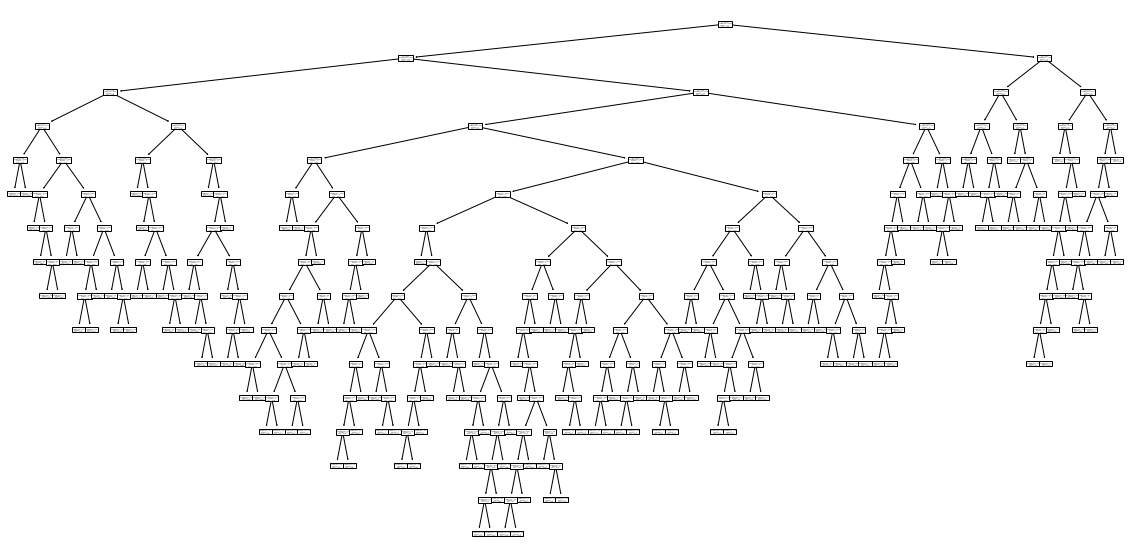

()

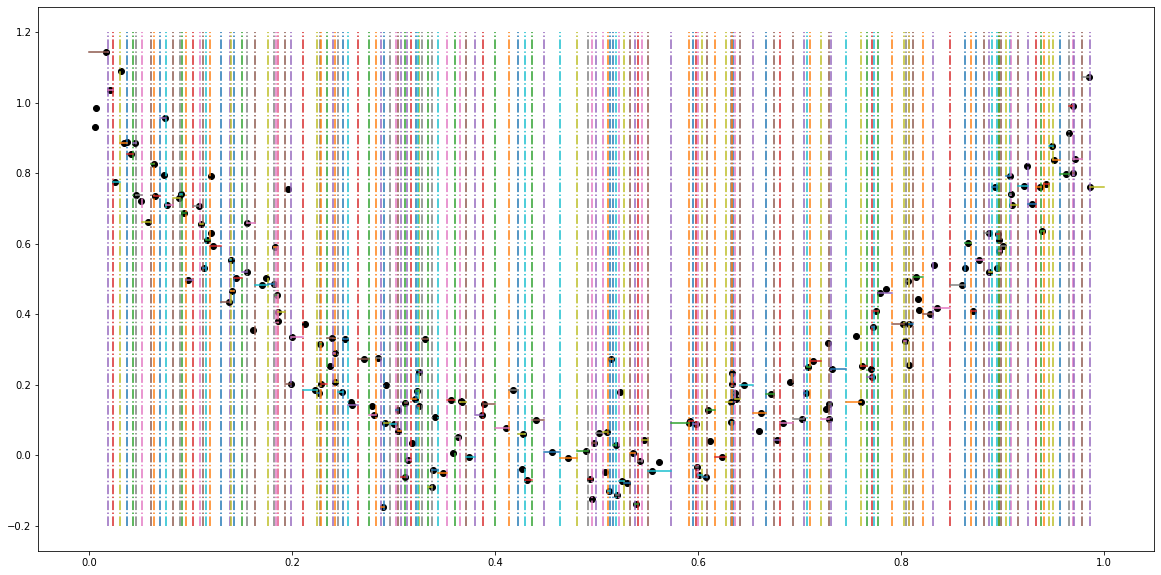

In [126]:
Regressor_3 = DecisionTreeRegressor(min_samples_leaf=1) 
Regressor_3.fit(DataFrame_task_train_B, DataFrame_task_train_A)

plt.figure(figsize=(20,10))
tree.plot_tree(Regressor_3,feature_names=DataFrame_task.columns)
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(DataFrame_task['X'],DataFrame_task['Y'],c='black')
Regression_pred_plot(Regressor_3,0,0,1,0)
# plt.legend()

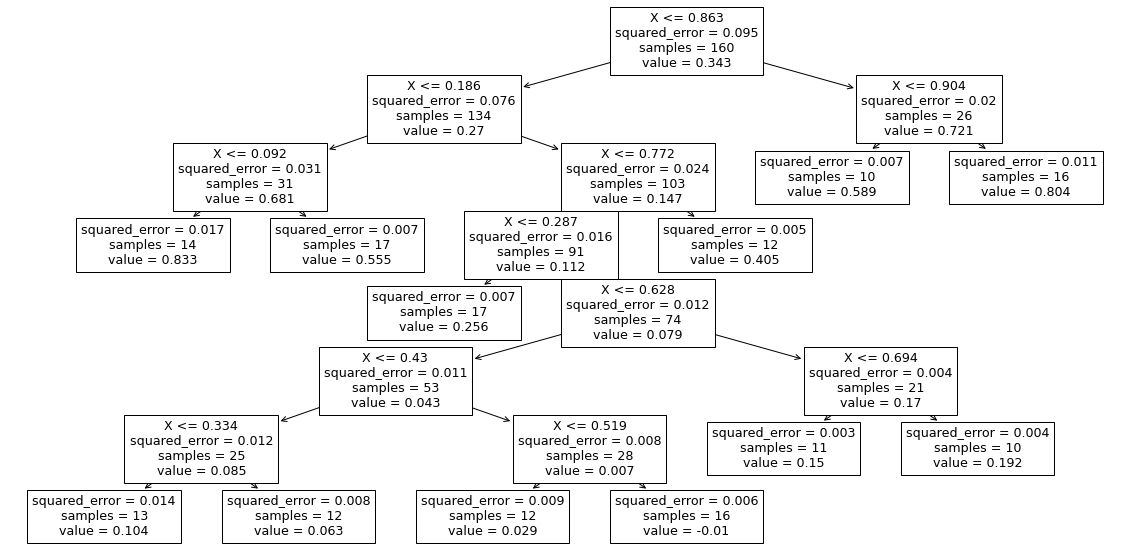

()

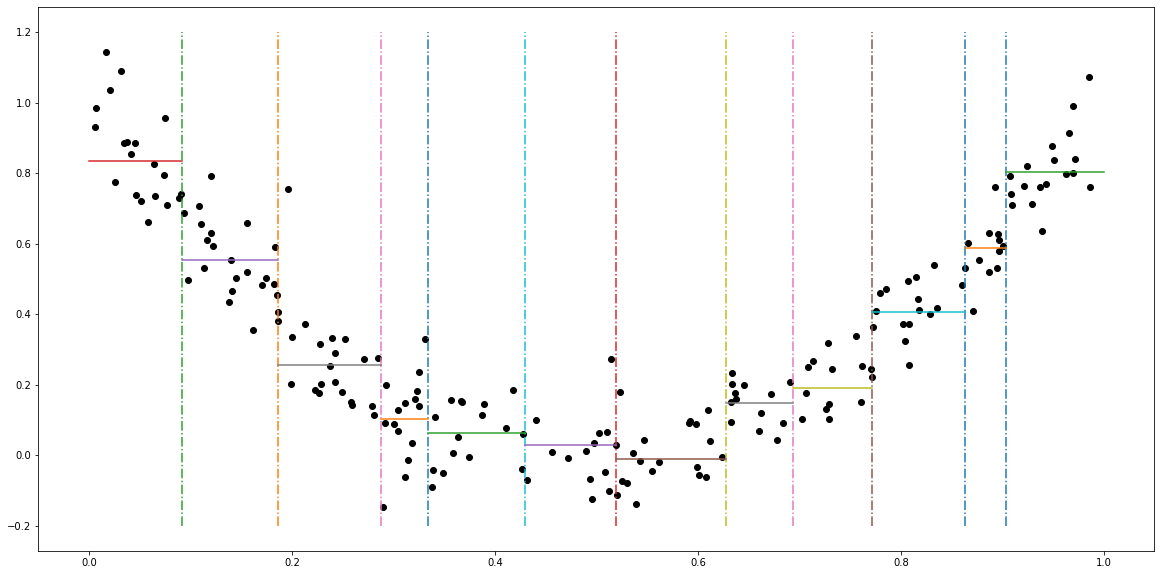

In [127]:
Regressor_4 = DecisionTreeRegressor(min_samples_leaf=10) 
Regressor_4.fit(DataFrame_task_train_B, DataFrame_task_train_A)

plt.figure(figsize=(20,10))
tree.plot_tree(Regressor_4,feature_names=DataFrame_task.columns)
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(DataFrame_task['X'],DataFrame_task['Y'],c='black')
Regression_pred_plot(Regressor_4,0,0,1,0)

# Q3)

## 1)

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [129]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins

df = load_penguins()

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [131]:
print("Correlation: ")
df.corr()

Correlation: 


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


In [132]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder
Lable_en=LabelEncoder()
for i in df.columns:
  if(df[i].dtype =='object'):
    df[i]=Lable_en.fit_transform(df[i])
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2009
340,1,1,43.5,18.1,202.0,3400.0,0,2009
341,1,1,49.6,18.2,193.0,3775.0,1,2009
342,1,1,50.8,19.0,210.0,4100.0,1,2009


In [134]:
X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

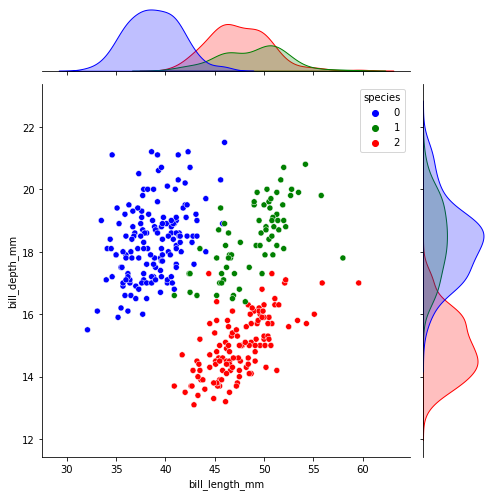

In [135]:
g = sns.jointplot(x="bill_length_mm",
               y="bill_depth_mm",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


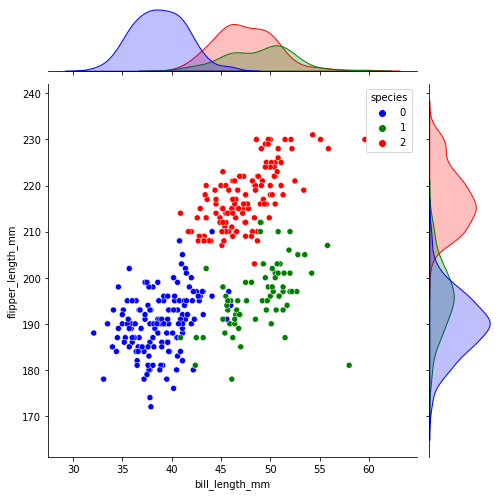

In [136]:
g = sns.jointplot(x="bill_length_mm",
               y="flipper_length_mm",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


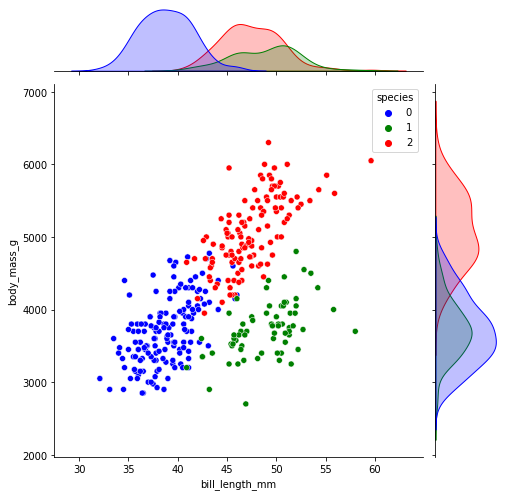

In [137]:
g = sns.jointplot(x="bill_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


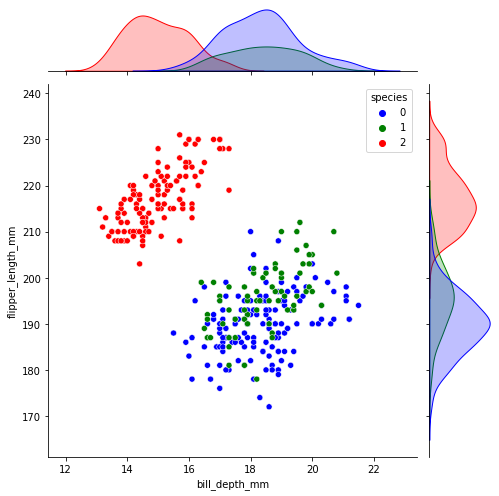

In [138]:
g = sns.jointplot(x="bill_depth_mm",
               y="flipper_length_mm",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


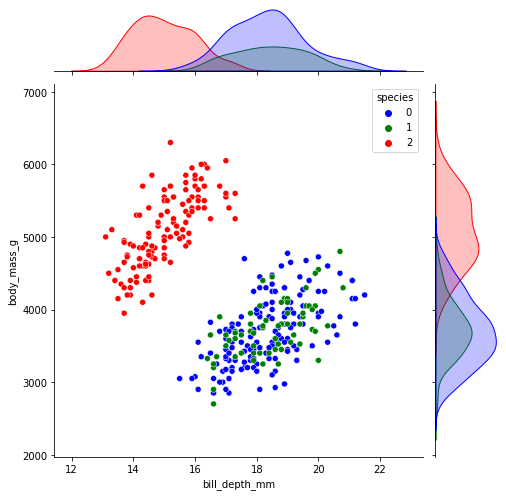

In [139]:
g = sns.jointplot(x="bill_depth_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


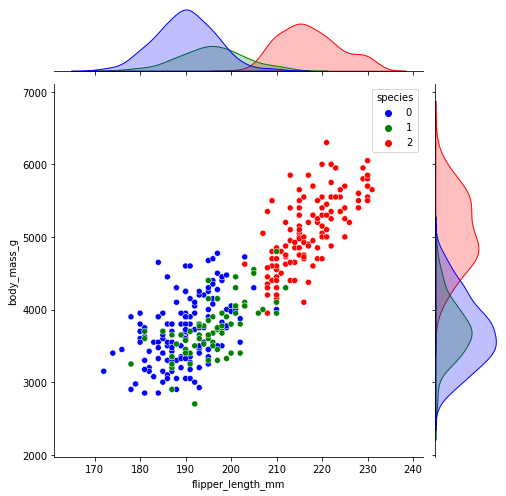

In [140]:
g = sns.jointplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['blue','green','red'])


## 2)

In [141]:
def gini_index(y):
  gini = 1
  for i in range(len(y.unique())):
    class_x=y[y[:] == i]
    gini = gini-(len(class_x)/len(y))**2
  return gini

gini_index(y)

0.6361786532608323